# Notebook for preparing and saving TSP graphs

In [1]:
import numpy as np
import torch
import dill as pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt

# Download TSP dataset

In [2]:
import os
import zipfile
import urllib.request

if not os.path.isfile('TSP.zip'):
    print('downloading..')
    url = "https://www.dropbox.com/s/1wf6zn5nq7qjg0e/TSP.zip?dl=1"
    urllib.request.urlretrieve(url, 'TSP.zip')
    
    print('extracting..')
    with zipfile.ZipFile('TSP.zip', 'r') as zip_ref:
        zip_ref.extractall('../')
else:
    print('File already downloaded')

downloading..
extracting..


# Convert to DGL format and save with pickle

In [3]:
import os
os.chdir('../../') # go to root folder of the project
# os.chdir('/Users/mattkim/Dev/MIT/benchmarking-gnns') # go to root folder of the project
print(os.getcwd())


/home/ubuntu/capstone/benchmarking-gnns


In [4]:
import dill as pickle

%load_ext autoreload
%autoreload 2

from torch.utils.data import DataLoader

from data.data import LoadData
from data.TSP import TSP, TSPDatasetDGL, TSPDataset

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [5]:
start = time.time()

DATASET_NAME = 'TSP'
dataset = TSPDatasetDGL(DATASET_NAME) 

print('Time (sec):',time.time() - start) # ~ 30 mins


DGL version detected: 2.4.0+cu124
Preparing all graphs for the TRAIN set...
Graphs saved to ./data/TSP/train_graphs.bin
Labels saved to ./data/TSP/train_labels.pkl
DGL version detected: 2.4.0+cu124
Preparing all graphs for the VAL set...
Graphs saved to ./data/TSP/val_graphs.bin
Labels saved to ./data/TSP/val_labels.pkl
DGL version detected: 2.4.0+cu124
Preparing all graphs for the TEST set...
Graphs saved to ./data/TSP/test_graphs.bin
Labels saved to ./data/TSP/test_labels.pkl
Time (sec): 354.9833664894104


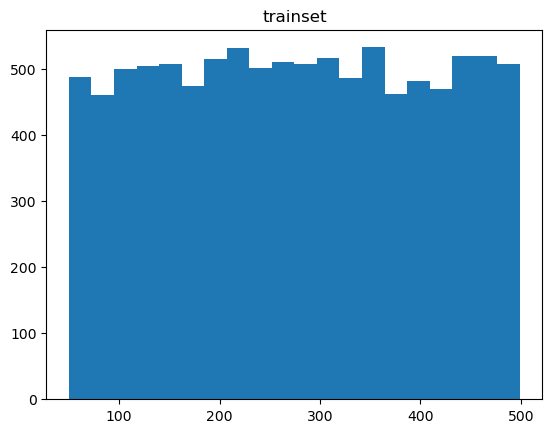

nb/min/max : 10000 50 499


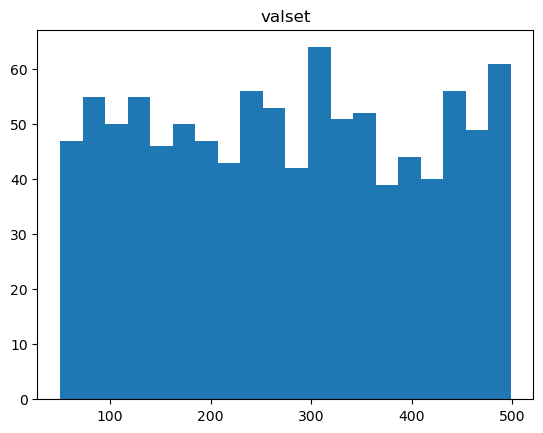

nb/min/max : 1000 50 499


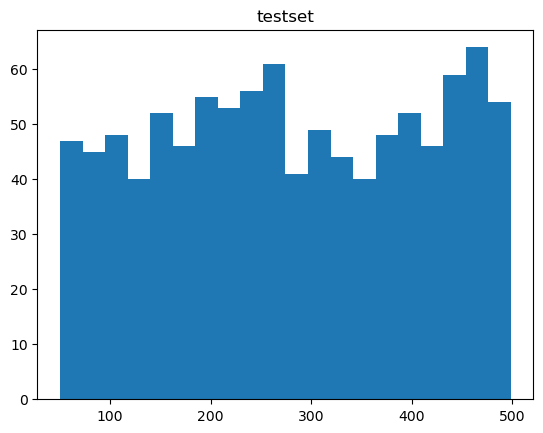

nb/min/max : 1000 50 499


In [6]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
        #graph_sizes.append(graph[0].number_of_edges())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('nb/min/max :',len(graph_sizes),graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [7]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


10000
1000
1000
(Graph(num_nodes=409, num_edges=10225,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}), [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
start = time.time()

with open('data/TSP/TSP.pkl','wb') as f:
    pickle.dump([dataset.train,dataset.val,dataset.test],f)
        
print('Time (sec):',time.time() - start) # 58s


Time (sec): 220.17470121383667


# Test load function

In [9]:
DATASET_NAME = 'TSP'
dataset = LoadData(DATASET_NAME)  # 20s
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset TSP...


/home/ubuntu/miniconda3/envs/benchmark_gnn/lib/python3.9/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 30.1730s


In [10]:
start = time.time()

batch_size = 10
collate = TSPDataset.collate
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

print('Time (sec):',time.time() - start)  # 0.0003s


Time (sec): 0.0003151893615722656


# Plot TSP samples

In [11]:
from scipy.spatial.distance import pdist, squareform
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx


def _edges_to_node_pairs(W):
    """Helper function to convert edge matrix into pairs of adjacent nodes.
    """
    pairs = []
    for r in range(len(W)):
        for c in range(len(W)):
            if W[r][c] == 1:
                pairs.append((r, c))
    return pairs

def plot_tsp(x_coord, W, tour):
    """
    Helper function to plot TSP tours.
    
    Args:
        x_coord: Coordinates of nodes
        W: Graph as adjacency matrix
        tour: Predicted tour
    """
    W_val = squareform(pdist(x_coord, metric='euclidean'))
    # Replace from_numpy_matrix with from_numpy_array
    G = nx.from_numpy_array(W_val)
    
    pos = dict(zip(range(len(x_coord)), x_coord))
    
    adj_pairs = _edges_to_node_pairs(W)
    
    tour_pairs = []
    for idx in range(len(tour)-1):
        tour_pairs.append((tour[idx], tour[idx+1]))
    tour_pairs.append((tour[idx+1], tour[0]))
    
    node_size = 50/(len(x_coord)//50)
    
    nx.draw_networkx_nodes(G, pos, node_color='b', node_size=node_size)
    nx.draw_networkx_edges(G, pos, edgelist=adj_pairs, alpha=0.25, width=0.1)
    nx.draw_networkx_edges(G, pos, edgelist=tour_pairs, alpha=1, width=1.5, edge_color='r')

In [12]:
filename = "data/TSP/tsp50-500_test.txt"
file_data = open(filename, "r").readlines()
num_neighbors = 25

In [13]:
for graph_idx, line in enumerate(file_data):
    line = line.split(" ")  # Split into list
    num_nodes = int(line.index('output')//2)

    # Convert node coordinates to required format
    nodes_coord = []
    for idx in range(0, 2 * num_nodes, 2):
        nodes_coord.append([float(line[idx]), float(line[idx + 1])])

    # Compute distance matrix
    W_val = squareform(pdist(nodes_coord, metric='euclidean'))
    # Determine k-nearest neighbors for each node
    knns = np.argpartition(W_val, kth=num_neighbors, axis=-1)[:, num_neighbors::-1]
    
    W = np.zeros((num_nodes, num_nodes))
    # Make connections 
    for idx in range(num_nodes):
        W[idx][knns[idx]] = 1

    # Convert tour nodes to required format
    # Don't add final connection for tour/cycle
    tour_nodes = [int(node) - 1 for node in line[line.index('output') + 1:-1]][:-1]

    # Compute an edge adjacency matrix representation of tour
    edges_target = np.zeros((num_nodes, num_nodes))
    for idx in range(len(tour_nodes) - 1):
        i = tour_nodes[idx]
        j = tour_nodes[idx + 1]
        edges_target[i][j] = 1
        edges_target[j][i] = 1
    # Add final connection of tour in edge target
    edges_target[j][tour_nodes[0]] = 1
    edges_target[tour_nodes[0]][j] = 1
    
    if num_nodes == 498:
        print(num_nodes)
        print(tour_nodes)

        plt.figure(figsize=(5,5))
        plot_tsp(nodes_coord, W, tour_nodes)
        plt.savefig(f"img/tsp{num_nodes}_{graph_idx}.pdf", format='pdf', dpi=1200, bbox_inches='tight')
        plt.show()
        print("Stop (y/n)")
        if input() == 'y':
            break

498
[0, 239, 442, 381, 429, 218, 467, 133, 329, 254, 43, 247, 51, 153, 192, 282, 485, 188, 249, 10, 305, 88, 298, 433, 363, 421, 135, 444, 87, 331, 257, 76, 352, 25, 328, 261, 412, 74, 258, 361, 436, 315, 317, 309, 106, 229, 435, 454, 406, 41, 336, 93, 348, 136, 262, 495, 196, 482, 7, 201, 260, 301, 430, 107, 134, 380, 147, 396, 233, 199, 94, 190, 456, 75, 175, 452, 198, 54, 299, 439, 445, 266, 13, 374, 47, 438, 214, 428, 166, 357, 70, 125, 256, 359, 393, 349, 416, 278, 354, 415, 92, 115, 252, 351, 369, 138, 313, 337, 91, 483, 441, 264, 243, 370, 80, 164, 320, 395, 477, 463, 302, 402, 450, 61, 42, 470, 272, 64, 373, 447, 65, 17, 449, 335, 353, 460, 391, 427, 59, 207, 345, 176, 476, 210, 31, 404, 472, 230, 334, 48, 440, 265, 112, 487, 338, 405, 101, 208, 151, 398, 57, 322, 228, 407, 342, 343, 137, 195, 33, 204, 186, 63, 255, 1, 165, 333, 385, 490, 116, 140, 162, 464, 324, 168, 492, 367, 491, 178, 177, 231, 173, 478, 310, 152, 365, 68, 461, 24, 379, 457, 29, 489, 297, 399, 281, 253, 362,

AttributeError: module 'networkx' has no attribute 'from_numpy_matrix'

<Figure size 500x500 with 0 Axes>